In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dnd-stats/stats.csv


In [2]:
df = pd.read_csv('/kaggle/input/dnd-stats/stats.csv')
df.describe()

,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,59.566700,145.267400,28.324500,12.850800,12.842500,12.752300,12.751500,12.414800,12.870100
std,13.246007,70.109265,2.360245,2.967528,2.945872,2.922293,2.945677,2.893817,2.974746
min,33.000000,36.000000,25.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
25%,52.000000,120.000000,25.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000
50%,64.000000,155.000000,30.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
75%,69.000000,188.000000,30.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
max,82.000000,360.000000,30.000000,20.000000,20.000000,20.000000,20.000000,19.000000,20.000000


In [3]:
df.race.value_counts(normalize=True)

dragonborn    0.1144
halfling      0.1135
gnome         0.1121
human         0.1120
tiefling      0.1120
elf           0.1112
dwarf         0.1095
half.elf      0.1086
half.orc      0.1067
Name: race, dtype: float64

The target distribution is pretty balanced. The baseline model that simply predicts the most common class would achieve an accuracy of 11.44%. 

In [4]:
def grouped_boxplot(x, group, data):
    sorted_index = df.groupby(group)[x].median().sort_values(ascending=False).index
    return sns.boxplot(y=group, x=x, data=data, order=sorted_index)

In [5]:
y = df.race
X = df.drop(columns='race')

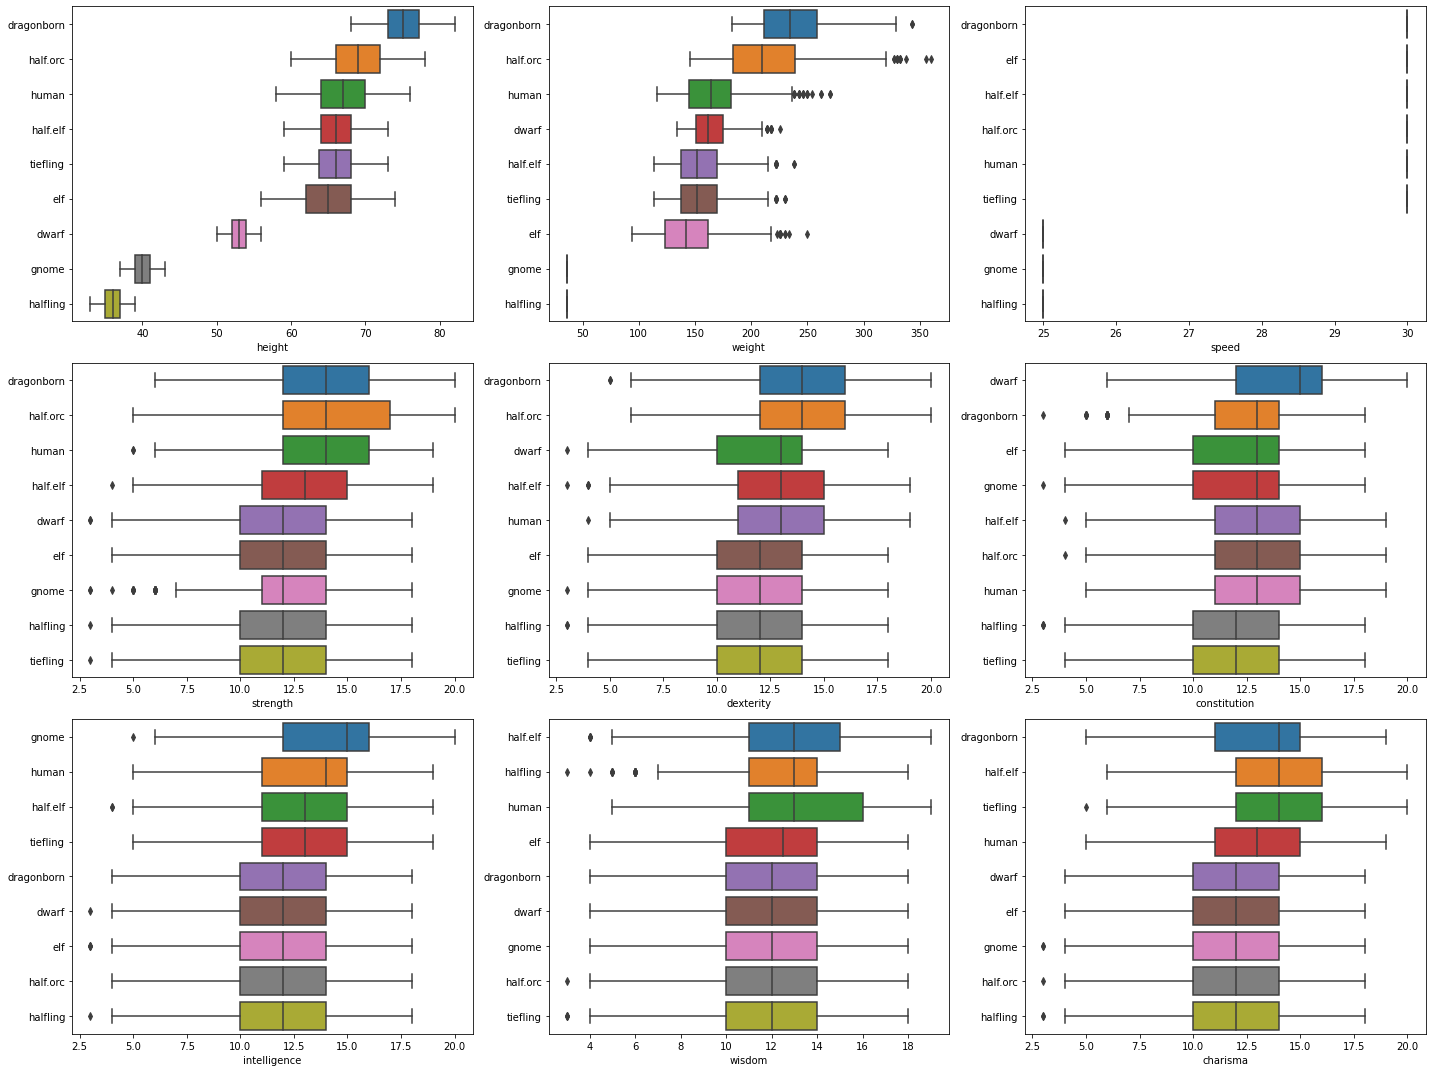

In [6]:
nsubplots = X.shape[1] # one subplot for each predictor
ncols = round(nsubplots**0.5)
nrows = (nsubplots // ncols) + (nsubplots % ncols)
position = range(1, nsubplots + 1)

fig = plt.figure(figsize=(20, 15))
for i in range(nsubplots):
    ax = fig.add_subplot(nrows, ncols, position[i])
    ax = grouped_boxplot(X.columns[i], 'race', df)
    ax.set(ylabel=None)
fig.tight_layout()
plt.show()